https://m.blog.naver.com/PostView.nhn?blogId=stop2y&logNo=221529660467&proxyReferer=https:%2F%2Fwww.google.com%2F

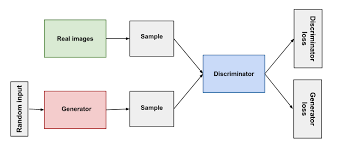

진짜 이미지를 주고 Discriminator에게 진짜임을 판단하게 함

노이즈를 주고 Generator에게 가짜 이미지를 만들고 이를 Discriminator에게 진짜 이미지인지 가짜 이미지인지 판단하게 함

GAN에서는 Generator는 노이즈를 통해 얻어낸 가짜 이미지를 기반으로 Discriminator를 속이도록 훈련

In [1]:
# 구글 마운트 기능 없을 때(불과 3달 전) 쓰던 기능 코드

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!cp '/content/drive/My Drive/Colab Notebooks/GAN.zip' ./

!unzip GAN.zip

Archive:  GAN.zip
replace test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test.txt                
replace test/Apple/321_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace test/Apple/321_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

 train.txt, test.txt

- '사진경로\사진라벨' 로 구성

- Apple: 0, Banana: 1, Orange: 2

train, test 폴더
- jpg 파일
- 높이 100, 길이 100
- 2채널 (Gray)

In [2]:
# %cd /content/GAN
%cd /content

/content


In [0]:
# train_jpg_path = '/content/train'
# test_jpg_path = '/content/test'

# train_path = '/content/train.txt'
# text_path = '/content/test.txt'

In [0]:
# import os
# import glob

In [3]:
# 모듈 불러오기
%tensorflow_version 1.x

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

TensorFlow 1.x selected.


In [6]:
# 시작 전 tensorflow 버전 확인 (tensorflow 2.0 이상 버전부터 placeholder error 남)

tf.__version__
#!pip install tensorflow-gpu==1.15.2

# !pip uninstall tensorflow
# !pip install tensorflow==1.15


# 출처: https://sikaleo.tistory.com/24 [SIKALEO]

'1.15.2'

In [0]:
# 데이터셋 정의
# train, test 파싱

# 실제 이미지, 라벨 파싱
train_list, test_list = [], []

with open('train.txt') as f:
  for line in f:
    tmp = line.strip().split()
    # [0] = 파일 이름
    # [1] = 과일 인덱스(0/1/2)
    train_list.append([tmp[0], tmp[1]])

with open('test.txt') as f:
  for line in f:
    tmp = line.strip().split()
    test_list.append([tmp[0], tmp[1]])
  
# train_list와 test_list에 [사진경로, 사진인덱스] 형태로 저장됨

In [0]:
print(train_list)

[['train\\Apple\\0_100.jpg', '0'], ['train\\Apple\\100_100.jpg', '0'], ['train\\Apple\\101_100.jpg', '0'], ['train\\Apple\\102_100.jpg', '0'], ['train\\Apple\\103_100.jpg', '0'], ['train\\Apple\\104_100.jpg', '0'], ['train\\Apple\\105_100.jpg', '0'], ['train\\Apple\\106_100.jpg', '0'], ['train\\Apple\\107_100.jpg', '0'], ['train\\Apple\\108_100.jpg', '0'], ['train\\Apple\\109_100.jpg', '0'], ['train\\Apple\\10_100.jpg', '0'], ['train\\Apple\\110_100.jpg', '0'], ['train\\Apple\\111_100.jpg', '0'], ['train\\Apple\\112_100.jpg', '0'], ['train\\Apple\\113_100.jpg', '0'], ['train\\Apple\\114_100.jpg', '0'], ['train\\Apple\\115_100.jpg', '0'], ['train\\Apple\\116_100.jpg', '0'], ['train\\Apple\\117_100.jpg', '0'], ['train\\Apple\\118_100.jpg', '0'], ['train\\Apple\\119_100.jpg', '0'], ['train\\Apple\\11_100.jpg', '0'], ['train\\Apple\\120_100.jpg', '0'], ['train\\Apple\\121_100.jpg', '0'], ['train\\Apple\\122_100.jpg', '0'], ['train\\Apple\\123_100.jpg', '0'], ['train\\Apple\\124_100.jpg', '

In [0]:


def readimg(path):
  #경로 때문에 문제가 생겨서 수정 

  if path.find('\\') > -1:
    path = path.replace('\\','\/')#############################
    path = path.replace('\\','') #############################

  
  # 이미지를 그레이 색 기준으로 다차원 Numpy 배열로 로드함 (100*100 Numpy 2차원 배열 로드)
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  #img = plt.imread(path, cmap='gray')
  # imread는 이미지를 다차원 Numpy 배열로 로딩함

  # 1차원 배열로 변환 - 100*100의 2차원 배열을 10000 크기의 1차원 배열로 (10000 = 100*100)
  #img = np.reshape(img, [-1, 10000])
  img = np.reshape(img, (-1,10000))
  # 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정

  return img

In [14]:
# 이미지 배열화 함수 선언
#############################
!cd '/content'#경로 변경
#############################

/bin/bash: line 0: cd: too many arguments


In [6]:
import os
os.getcwd()

'/content'

In [0]:
# 이미지, 라벨 반환 정의
def batch(train_list, batch_size):
  img, label, paths = [], [], []
  

  for i in range(batch_size):

    # img에는 readimg() 함수를 이용하여 1차원 이미지 배열 저장

    img.append(readimg(train_list[0][0]))
    # print(img)
    # 인덱스 개수(3개)만큼 리스트를 사전에 초기화
    label_list = [0 for _ in range(n_class)]
    label_list[int(train_list[0][1])] = int(train_list[0][1])
    label.append(label_list)
    # print(label)

    # 사과 = [0, 0, 0]
    # 오렌지 = [0, 1, 0]
    # 바나나 = [0, 0, 2]
    paths.append(train_list.pop(0))
  
  return img, label

In [0]:
# 옵션(인자) 값 사전 정의

# 옵션

# 입력값의 크기 (이미지 크기, 높이*길이)
n_input = 100*100

# 인덱스의 개수 (사과, 오렌지, 바나나 3개)
n_class = 3

# 생성자의 입력값으로 사용할 노이즈의 크기
n_noise = 128

# 전체 데이터 학습 총 횟수 (세대 학습 숫자)
total_epoch = 10

# 한번에 학습할(입력할) 데이터의 개수, 1461개씩 학습시킴
batch_size = 1461

# 최적화 함수에 사용되는 학습률
learning_rate = 0.0002

# 은닉층 뉴런 개수
n_hidden = 256

In [0]:
# 신경망 모델 구성

# 인풋(이미지 입력) - 2차원 행렬을 1차원으로 변환하여 받음 (100*100 = 10000)
X = tf.placeholder(tf.float32, [None, n_input])

# 노이즈에 제공할 힌트 인덱스 라벨
Y = tf.placeholder(tf.float32, [None, n_class])

# 노이즈를 입력할 플레이스 홀더
Z = tf.placeholder(tf.float32, [None, n_noise])

In [0]:
# 생성자 신경망 구현
def generator(noise, labels):
  with tf.variable_scope('generator'):
    # noise 값에 labels 정보를 추가
    inputs = tf.concat([noise, labels], 1) # noise 값에 label 추가

    # tensorflow 에서 제공하는 유틸리티 함수 이용
    hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
    output = tf.layers.dense(hidden, n_input, activation=tf.nn.sigmoid)

  return output

In [0]:
# 구분자 신경망 구현
def discriminator(inputs, labels, reuse=None):
  with tf.variable_scope('discriminator') as scope:

    # 노이즈에 생성한 이미지와 실제 이미지를 판별하는 모델 변수를 동일하게 하기 위해 이전 변수 재사용
    if reuse:
      scope.reuse_variables()

    inputs = tf.concat([inputs, labels], 1)
    hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
    
    output = tf.layers.dense(hidden
                             # 판별기의 최종 결과값은 얼마나 진짜와 가까운지 판단하는 1개의 스칼라 값
                             , 1
                             # 활성화 함수를 사용하지 않음
                             # (손실 값 계산 시 sigmoid_cross_entropy_with_logits 함수 사용을 위함)
                             , activation=None)
  return output

In [0]:
# 노이즈 생성 유틸리티 함수 선언
# 균등 분포를 통한 노이즈 생성
def get_noise(batch_size, n_noise):
  # np.random.uniform()을 이용하여 균등 분포 -1과 1 사이의 랜덤값 추출
  # size= 랜덤값 배열들을 저장할 (행, 열) 크기
  return np.random.uniform(size=(batch_size, n_noise))

In [13]:
# 모델 구성

# Generator1 - 노이즈를 입력받아 가짜 이미지를 생성시키는 생성자 G
G = generator(Z, Y)

# Discriminator1 - 진짜 이미지 데이터를 이용
D_real = discriminator(X, Y)

# Discriminator2 - 노이즈를 통해 얻어낸 가짜 이미지 데이터를 대입
D_gene = discriminator(G, Y, True)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
import tensorflow as tf
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

In [0]:
# 손실 함수 작성

# 손실값1 - Generator가 만든 가짜 이미지를 Discriminator가 진짜라고 판단하는 손실값 (D_real, loss_D_real)
# D_real은 진짜 이미지를 판단하는 것이므로 1에 가까움
loss_D_real = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=D_real
        , labels=tf.ones_like(D_real)) # ones_like() : 1에 가깝게
    )

# 손실값2 - Generator가 만든 가짜 이미지를 Discriminator가 가짜라고 판단하는 손실값 (D_gene, loss_D_gene)
# D_gene은 가짜 이미지를 판단하는 것이므로 0에 가까움
loss_D_gene = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=D_gene
        , labels=tf.zeros_like(D_gene)) # zeros_like() : 0에 가깝게
    )


# loss_D_real 과 loss_D_gene을 더한 뒤 이 값을 최소화하도록 최적화
loss_D = loss_D_real + loss_D_gene
# 1에 가까울수록 실제 이미지로 판별
# loss_D 값을 최대화하면 진짜 이미지를 판별할 능력이 생김

# 생성자 generator(Z)를 통해서 얻은 G를 Discriminator에 대입한 D_gene 가짜 이미지 아웃풋이 1에 가깝게 만듦
# 가짜 이미지를 넣어도 진짜 같다고 판별할 수 있게 함
# 가짜 이미지가 진짜 이미지와 가까울 수 있도록 생성망을 학습시키기 위해 D_gene을 최대한 1에 가깝도록 만드는 손실함수
loss_G = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=D_gene # D_gene을 그대로 넣어 손실값으로 지정
        , labels=tf.ones_like(D_gene)) # 1에 가깝게 할수록 가짜 이미지에 대한 학습이 가능해짐
    )


In [0]:
# 학습 모델 변수 선언

vars_D = tf.get_collection(
    tf.GraphKeys.TRAINABLE_VARIABLES
    , scope = 'discriminator'
    )

vars_G = tf.get_collection(
    tf.GraphKeys.TRAINABLE_VARIABLES
    , scope = 'generator'
    )

train_D = tf.train.AdamOptimizer(learning_rate).minimize(loss_D
                                                         , var_list=vars_D)

train_G = tf.train.AdamOptimizer(learning_rate).minimize(loss_G
                                                         , var_list=vars_G)

In [17]:
# 학습 진행
# MNIST 데이터를 사용하지 않고 학습 시키기
loss_val_D, loss_val_G = 0, 0
# 신경망 모델 학습
sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())

cpkt = tf.train.get_checkpoint_state('./GAN') # GAN 폴더 내에 저장한 학습 세션이 있는지 확인
if cpkt and tf.train.checkpoint_exists(cpkt.model_checkpoint_path):
  saver.restore(sess, cpkt.model_checkpoint_path) # ./GAN 폴더 내에 학습한 세션이 있으면 다시 불러오고 종료
  print('Load sess')
else:
  sess.run(tf.global_variables_initializer()) # 만약 ./GAN 폴더 내에 학습한 세션이 없다면 초기화

  # 세대 학습
  for epoch in range(12):
    # 한 세대에 100회 반복 학습
    for i in range(100):
      batch_xs, batch_ys = batch(train_list, batch_size)
      # batch_xs: 각 이미지별 1차원 리스트 존재
      # batch_ys: 각 이미지 인덱스에 맞는 3-class 리스트 존재
      
      # 노이즈 함수를 통해 가짜 이미지와 유사한 1차원 배열 생성
      noise = get_noise(batch_size, n_noise)

      # 구분자 학습
      _, loss_val_D = sess.run([train_D, loss_D]
                               , feed_dict = {X:batch_xs
                                              , Y: batch_ys
                                              , Z: noise})
      # 생성자 학습
      _, loss_val_G = sess.run([train_G, loss_G]
                               , feed_dict = {Y: batch_ys
                                              , Z: noise})
    print('Epoch= ', epoch, ', D loss= ', loss_val_D, ', G loss= ', loss_val_G)

    # 학습 중간 과정 점검
    if epoch == 0 or (epoch) % 2 == 0:
      
      # 샘플 이미지 10개
      sample_size = 10
      
      # 노이즈 생성
      noise = get_noise(sample_size, n_noise)

      # 생성한 노이즈 출력
      samples = sess.run(G, feed_dict = {Y: batch_ys[:sample_size], Z: noise})

      # plt() 함수를 이용하여 이미지 출력
      fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 1))
      for i in range(sample_size):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()

        # 100*100 크기 진짜 이미지 출력
        ax[1][i].imshow(np.reshape(batch_xs[i], (100, 100)))

        # 100*100 노이즈로 생성한 이미지 출력
        ax[1][i].imshow(np.reshape(samples[i], (100, 100)))
      
      # samples2 폴더에 png로 저장
      plt.savefig('./samples2/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
      plt.close(fig)

print('end')

ValueError: ignored

In [0]:
# 이미지 배열화 함수 선언
!cd '/content'

import os
os.getcwd()

def readimg(path):
  path = path.replace('\\','\/')
  path = path.replace('\\','')
  print(path)
  # 이미지를 그레이 색 기준으로 다차원 Numpy 배열로 로드함 (100*100 Numpy 2차원 배열 로드)
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  #img = plt.imread(path, cmap='gray')
  # imread는 이미지를 다차원 Numpy 배열로 로딩함
  print(type(img))

  # 1차원 배열로 변환 - 100*100의 2차원 배열을 10000 크기의 1차원 배열로 (10000 = 100*100)
  #img = np.reshape(img, [-1, 10000])
  img = np.reshape(img, (-1,10000))
  # 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정

  return img

In [0]:
# 이미지, 라벨 반환 정의
def batch(train_list, batch_size):
  img, label, paths = [], [], []
  

  for i in range(batch_size):

    # img에는 readimg() 함수를 이용하여 1차원 이미지 배열 저장
    #img.append(readimg(train_list[0][0]))
    img.append(readimg(train_list[0][0]))
    # print(img)
    # 인덱스 개수(3개)만큼 리스트를 사전에 초기화
    label_list = [0 for _ in range(n_class)]
    label_list[int(train_list[0][1])] = int(train_list[0][1])
    label.append(label_list)
    # print(label)

    # 사과 = [0, 0, 0]
    # 오렌지 = [0, 1, 0]
    # 바나나 = [0, 0, 2]
    paths.append(train_list.pop(0))
  
  return img, label

In [0]:
from google.colab import drive
drive.mount('/content/drive')